In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from scipy.sparse import hstack
from textblob import TextBlob

In [115]:
df = pd.read_csv('minedtweets.csv')
print(df.shape)
df=df.drop(columns=df.columns[0])

df['tweet'].replace('', np.nan,inplace=True)
df=df.drop_duplicates(subset='tweet')
#df = pd.read_csv('newtweets.csv')
#f.dropna(subset=['tweet'], inplace=True)
df = df[df['tweet'].notnull()]
print(df.shape)
#df.to_csv('newtweets.csv')

(90337, 3)
(40924, 2)


 0    26404
 1     9787
-1     4733
Name: sentiment, dtype: int64


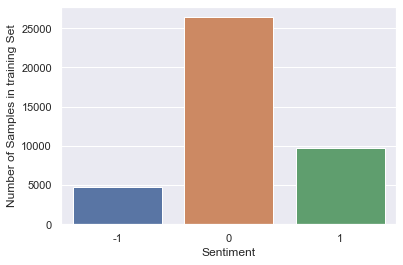

In [123]:
sns.set(style="darkgrid")
ax = sns.countplot(x="sentiment", data=df)
ax.set_ylabel("Number of Samples in training Set")
ax.set_xlabel("Sentiment")
#ax.savefig('sentiment.jpg')
print(df['sentiment'].value_counts())

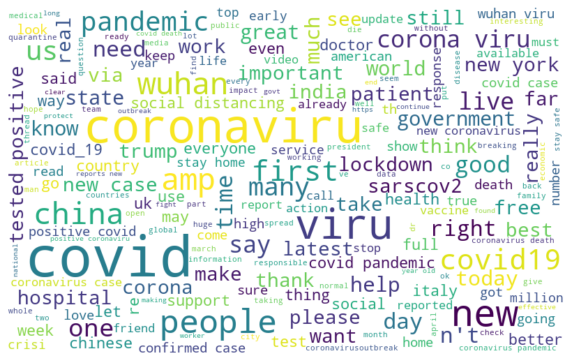

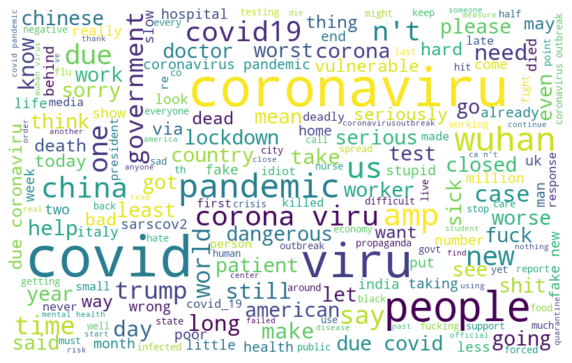

prepared take care family naturally must-watch video coronavirus coron


In [124]:
pos_words=df['tweet'][df['sentiment'] == 1]
neg_words=df['tweet'][df['sentiment'] == -1]
#print(pos_words[0])
#stoplists=set(['``','...','\'s','covid-19','coronavirus','SARSCoV2','coronavirusoutbreak','covid','covid19','19','sarscov2','corona','covid_19','virus','coronaviru'])
pos = ' '.join([text for text in pos_words])
neg = ' '.join([text for text in neg_words])

#all_words = ' '.join([text for text in tweetslower])
#print(len(all_words))

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=500, random_state=21, max_font_size=80).generate(pos)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('positive_cloud.jpg')
plt.show()

wordcloud = WordCloud(background_color='white',width=800, height=500, random_state=21, max_font_size=80).generate(neg)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('negative_cloud.jpg')
plt.show()
print(df['tweet'][0])

people : 709
wuhan : 652
cases : 633
first : 623
pandemic : 565
china : 489
positive : 443
many : 395
good : 348
social : 327


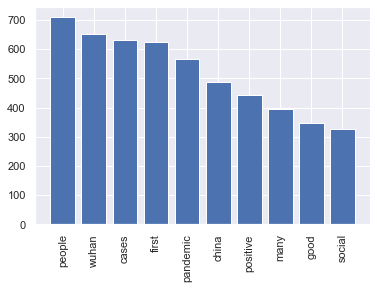

people : 419
pandemic : 376
wuhan : 314
china : 193
like : 170
trump : 163
world : 156
health : 144
government : 132
news : 129


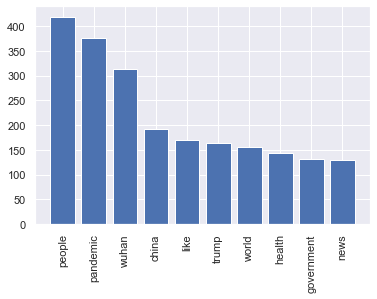

In [122]:
import collections
pos_words=[]
neg_words=[]
pos_words=df['tweet'][df['sentiment'] == 1]
neg_words=df['tweet'][df['sentiment'] == -1]

worddict=collections.defaultdict(int)
stoplists=set(['``','...','\'s','covid-19','coronavirus','SARSCoV2','coronavirusoutbreak','covid','covid19','19','sarscov2','corona','covid_19','virus'])

for line in pos_words:
    for word in line.split():
        if word not in stoplists and len(word)>3:
            worddict[word]+=1
mc = sorted(worddict.items(), key=lambda k_v: k_v[1], reverse=True)[:10]
for word, count in mc:
    print(word, ":", count)
   
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
plt.xticks(rotation=90)
plt.savefig('bar.png')
plt.show()

#negative
worddict=collections.defaultdict(int)
for line in neg_words:
    for word in line.split():
        if word not in stoplists and len(word)>3:
            worddict[word]+=1
mc = sorted(worddict.items(), key=lambda k_v: k_v[1], reverse=True)[:10]
for word, count in mc:
    print(word, ":", count)
   
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
plt.xticks(rotation=90)
plt.savefig('bar2.png')
plt.show()

wuhan : 2857
people : 1779
pandemic : 1778
china : 1725
para : 1278
cases : 975
trump : 842
health : 772
world : 754
chinese : 733


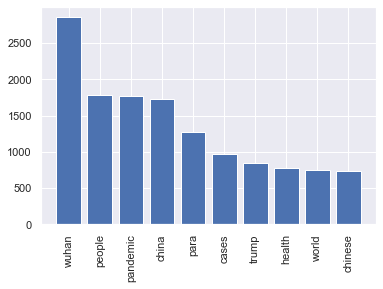

In [113]:
import collections
worddict=collections.defaultdict(int)
stoplists=set(['``','...','\'s','covid-19','coronavirus','SARSCoV2','coronavirusoutbreak','covid','covid19','19','sarscov2','corona','covid_19','virus'])

for line in df['tweet']:
    for word in line.split():
        if word not in stoplists and len(word)>3:
            worddict[word]+=1
mc = sorted(worddict.items(), key=lambda k_v: k_v[1], reverse=True)[:10]
for word, count in mc:
    print(word, ":", count)
   
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
plt.xticks(rotation=90)
plt.savefig('bar.png')
plt.show()